Le but de ce .ipynb est de preprocess la base de donnée suite aux modifications qu'on a effectué en tenant compte du weldID dans le preprocessing. On utilise alors le prepoAvecWeldID.csv

Les étapes du preprocessing sont les suivantes:                                      -Categorical values (déja effectué dans prepAvecWeldID.csv)                                   -Weird values  (déja effectué dans prepAvecWeldID.csv )                                        -Gestion des colonnes tenant compte du weld ID    (déja effectué dans prepAvecWeldID.csv)     
-Same Unit                                                                                      -Delete Colonnes                                                                              -Outliers                                                                                     -Imputer :Univariate                                                                          -Imputer: Multivariate                                                                        -Normalization/Standardization                                                                -Shuffle

In [78]:
import pandas as pd
from pathlib import Path

# Define the relative path to the '4 - Dataset' folder
dataset_dir = Path('../4 - Dataset')

# Load the CSV file
df = pd.read_csv(dataset_dir / 'prepoAvecWeldID.csv')


print("Valeurs uniques pour 'interpass temperature' et 'type of weld' dans le dataset :")
print(df['Interpass temperature (deg C)'].unique())
print(df['Type of weld'].unique())
df['Type of weld'] = df['Type of weld'].astype('category')
df['AC or DC'] = df['AC or DC'].astype('category')
df['Electrode positive or negative'] = df['Electrode positive or negative'].astype('category')

print(df.dtypes)

Valeurs uniques pour 'interpass temperature' et 'type of weld' dans le dataset :
[200. 150. 175. 107. 100. 250. 140. 300.  20. 240. 177. 125. 225. 210.]
[0 4 2 1 3 9 8 7 5 6]
Carbon concentration (weight%)                   float64
Silicon concentration (weight%)                  float64
Manganese concentration (weight%)                float64
Sulphur concentration (weight%)                  float64
Phosphorus concentration (weight%)               float64
Nickel concentration (weight%)                   float64
Chromium concentration (weight%)                 float64
Molybdenum concentration (weight%)               float64
Vanadium concentration (weight%)                 float64
Copper concentration (weight%)                   float64
Cobalt concentration (weight%)                   float64
Tungsten concentration (weight%)                 float64
Oxygen concentration (ppm)                       float64
Titanium concentration (ppm)                     float64
Nitrogen concentration (ppm

# Même unité

Même unités pour les colonnes nécésssaire ( de weight% à ppm)

In [79]:
# List of columns containing values in weight % to convert to ppm
weight_percent_columns = [
    "Carbon concentration (weight%)", "Silicon concentration (weight%)", 
    "Manganese concentration (weight%)", "Sulphur concentration (weight%)", 
    "Phosphorus concentration (weight%)", "Nickel concentration (weight%)", 
    "Chromium concentration (weight%)", "Molybdenum concentration (weight%)", 
    "Vanadium concentration (weight%)", "Copper concentration (weight%)", 
    "Cobalt concentration (weight%)", "Tungsten concentration (weight%)"
]

# Multiply the values in weight % by 10,000 to get ppm
for column in weight_percent_columns:
    if column in df.columns:
        df[column] = df[column].apply(lambda x: x * 10000 if pd.notnull(x) else x)

# Rename the columns to add '_ppm' suffix
df.rename(columns={col: f"{col.split(' (')[0]} (ppm)" for col in weight_percent_columns if col in df.columns}, inplace=True)

# Define the relative path for saving the new CSV file in '4 - Dataset'
output_path = dataset_dir / 'clustering_weld_data.csv'

# Save the converted data to the new CSV file
df.to_csv(output_path, index=False)

print(f"The file has been successfully saved at: {output_path}")


The file has been successfully saved at: ../4 - Dataset/clustering_weld_data.csv


# Suppression de colonnes

Supprimer les colonnes avec plus de 80% de data supprimer

In [80]:
import pandas as pd
from pathlib import Path

# Define the path to the '4 - Dataset' directory
dataset_dir = Path('../4 - Dataset')

# Load the clustering_weld_data.csv file
df = pd.read_csv(dataset_dir / 'clustering_weld_data.csv')

# Afficher les colonnes avant la suppression
print("Colonnes avant la suppression :")

print(df.columns)

# Définir les colonnes à supprimer
columns_to_drop = [
    "Ferrite with carbide aggregate (%)",  
    "Martensite (%)",
    "Acicular ferrite (%)",
    "Ferrite with second phase (%)",
    "Primary ferrite in microstructure (%)",
    "50 % FATT",
    "Hardness (kg/mm2)",
    "Antimony concentration (ppm)",
    "Arsenic concentration (ppm)",
    "Tin concentration (ppm)", 
    "Weld_ID",
    "Cobalt concentration (ppm)",
    "Tungsten concentration (ppm)"
]

# Supprimer les colonnes
df_dropped = df.drop(columns=columns_to_drop)

# Afficher les colonnes après la suppression
print("\nColonnes après la suppression :")
print(df_dropped.columns)

# Écraser le fichier CSV original avec les données modifiées
df_dropped.to_csv(dataset_dir / "clustering_weld_data.csv", index=False)
print("\nLes données avec les colonnes supprimées ont été écrites dans 'clustering_weld_data.csv' avec succès.")


Colonnes avant la suppression :
Index(['Carbon concentration (ppm)', 'Silicon concentration (ppm)',
       'Manganese concentration (ppm)', 'Sulphur concentration (ppm)',
       'Phosphorus concentration (ppm)', 'Nickel concentration (ppm)',
       'Chromium concentration (ppm)', 'Molybdenum concentration (ppm)',
       'Vanadium concentration (ppm)', 'Copper concentration (ppm)',
       'Cobalt concentration (ppm)', 'Tungsten concentration (ppm)',
       'Oxygen concentration (ppm)', 'Titanium concentration (ppm)',
       'Nitrogen concentration (ppm)', 'Aluminium concentration (ppm)',
       'Boron concentration (ppm)', 'Niobium concentration (ppm)',
       'Tin concentration (ppm)', 'Arsenic concentration (ppm)',
       'Antimony concentration (ppm)', 'Current (A)', 'Voltage (V)',
       'AC or DC', 'Electrode positive or negative', 'Heat input (kJ/mm)',
       'Interpass temperature (deg C)', 'Type of weld',
       'Post weld heat treatment temperature (deg C)',
       'Post weld h

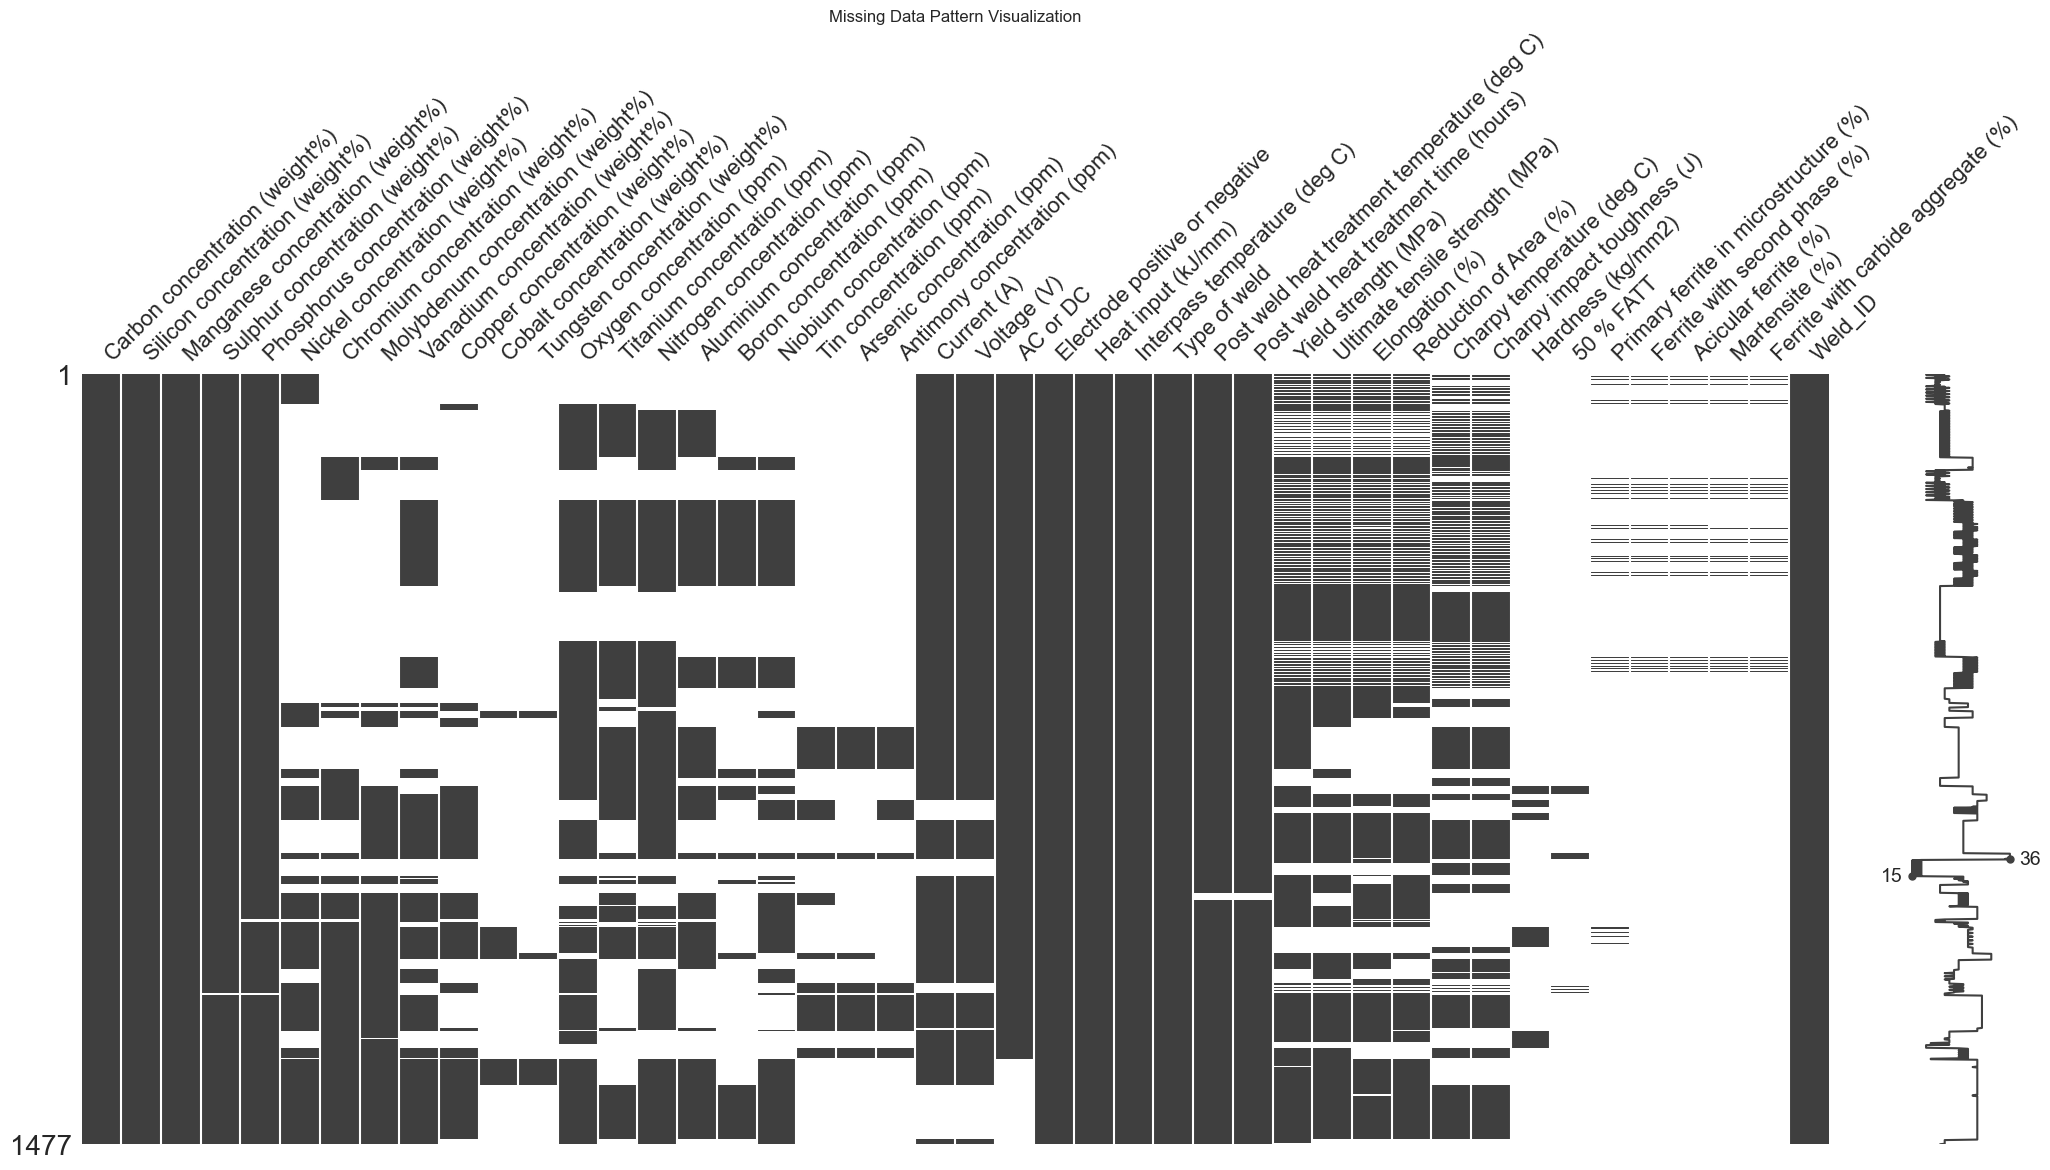

In [99]:
import missingno as msno
import matplotlib.pyplot as plt

df = pd.read_csv(dataset_dir / 'prepoAvecWeldID.csv')
# Visualize the missing data pattern
msno.matrix(df)
plt.title("Missing Data Pattern Visualization")
plt.show() 

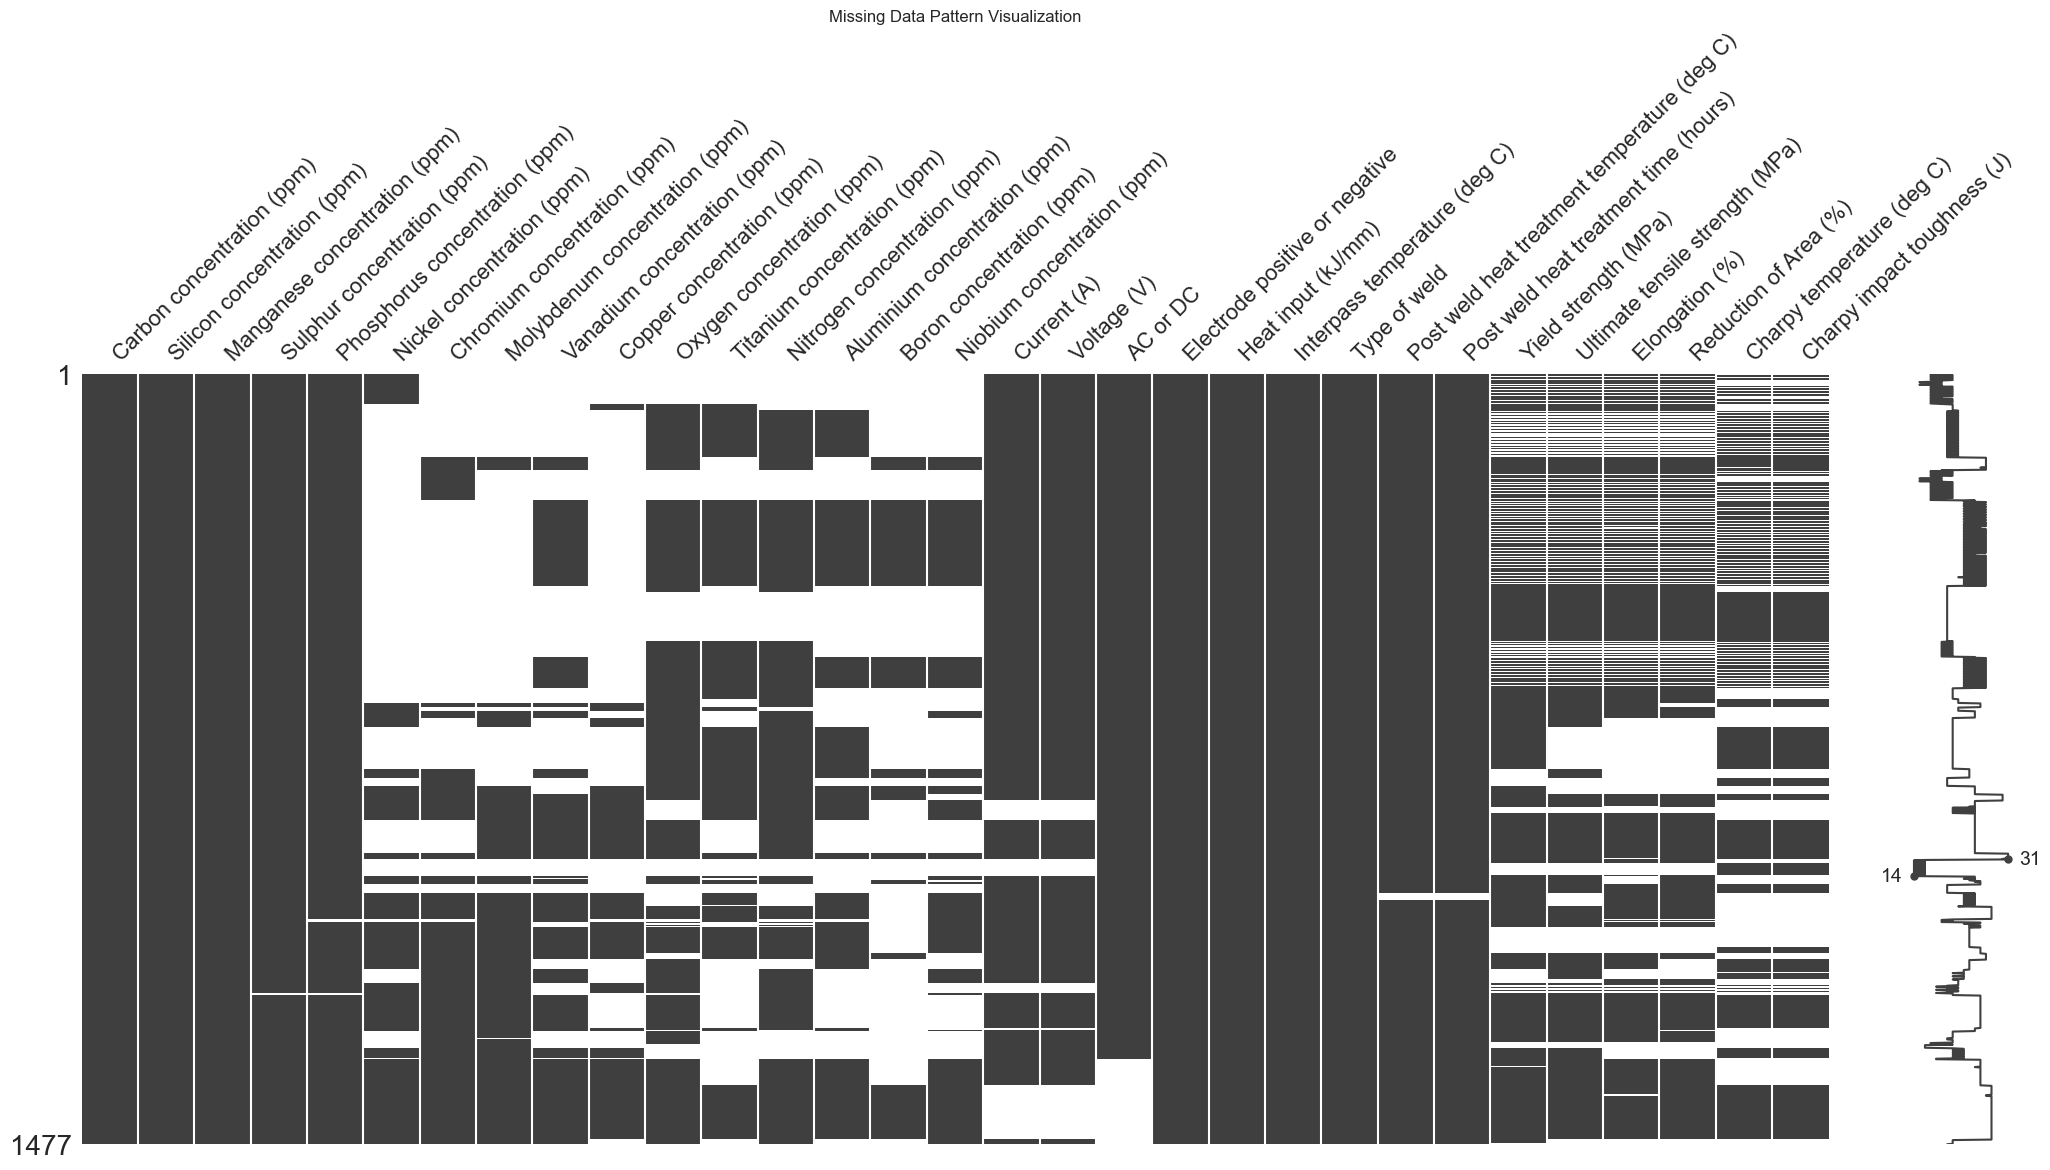

In [81]:
import missingno as msno
import matplotlib.pyplot as plt

df = pd.read_csv(dataset_dir / 'clustering_weld_data.csv')
# Visualize the missing data pattern
msno.matrix(df)
plt.title("Missing Data Pattern Visualization")
plt.show() 

# Les outliers

Maintenant on va prendre en compte les outliers. Deux possibilités on peut soit supprimer les outliers totalement (en utilisant un coefficiant de 6 pour le IQR c ), soit les imputer en utilisant des méthodes telle que le caping . 

On commence par supprimer les outliers 

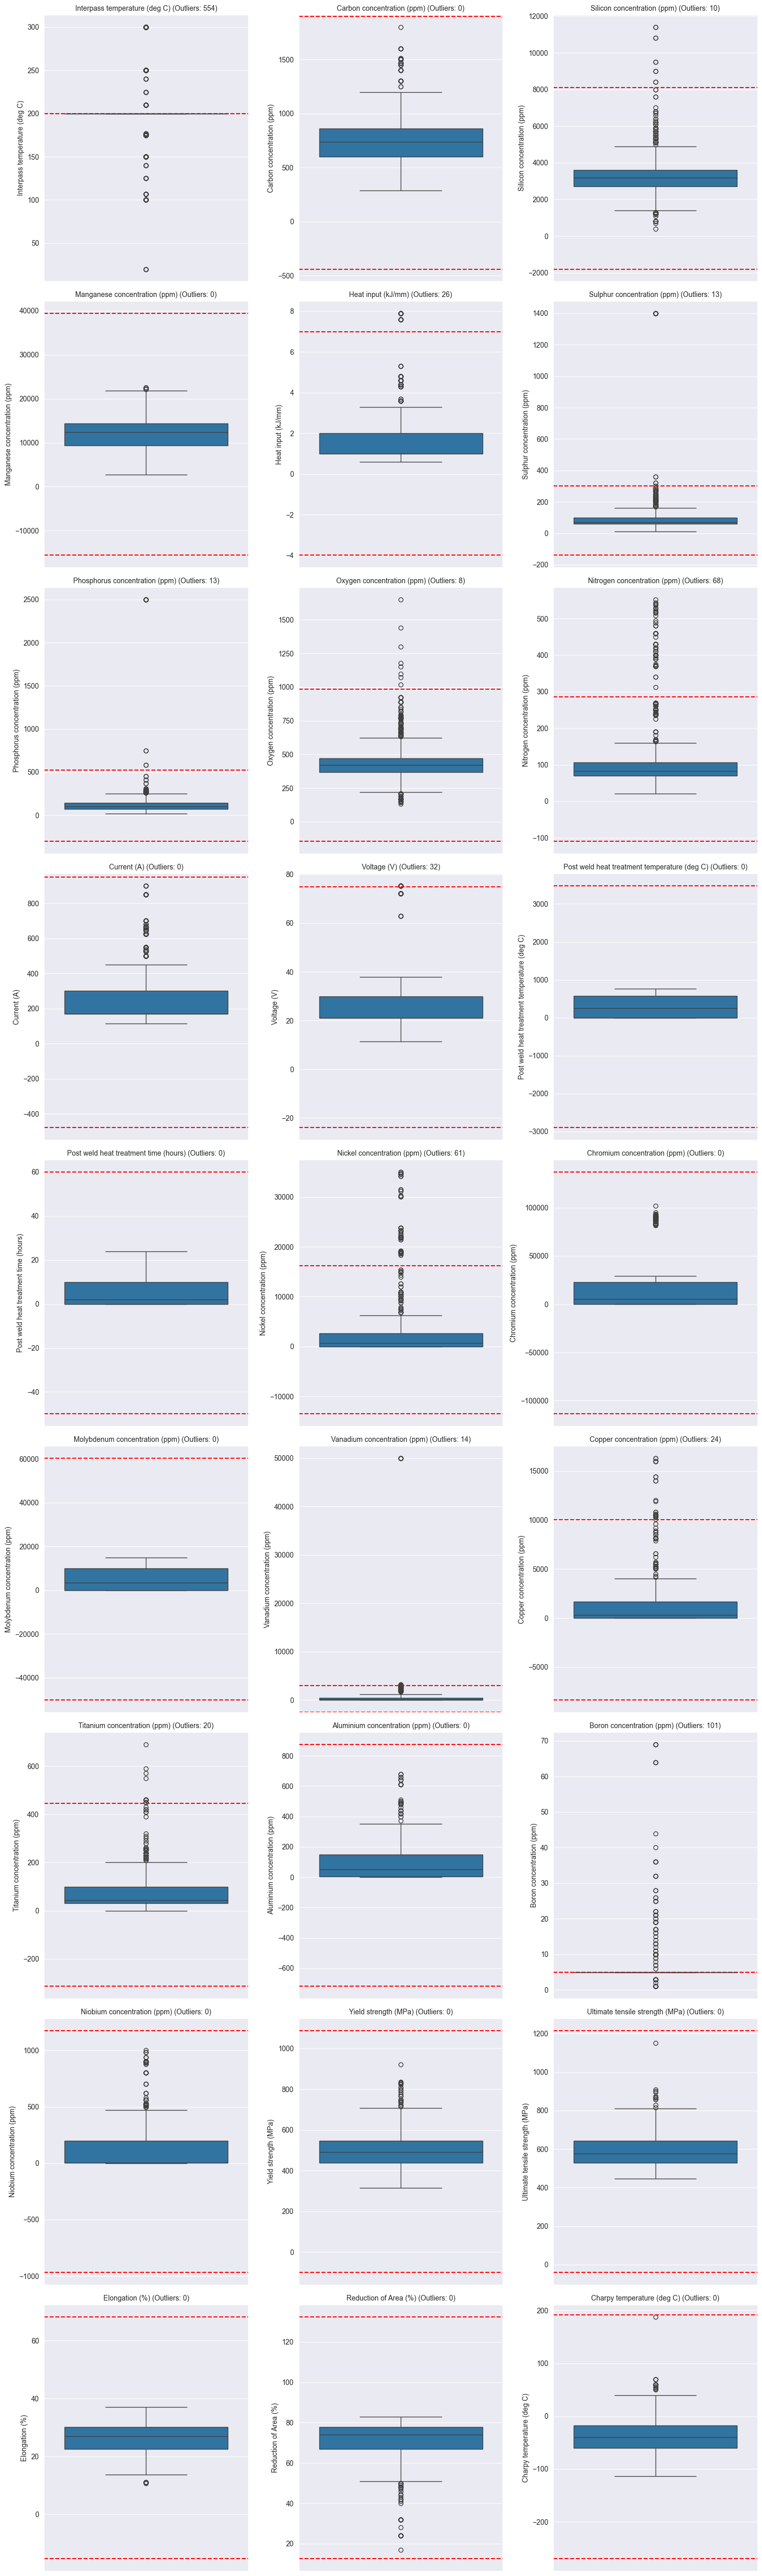

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Charger les données
dataset_dir = Path('../4 - Dataset')
df = pd.read_csv(dataset_dir / 'clustering_weld_data.csv')

# 1. Identification des Outliers avec IQR
def get_outlier_indices_iqr(df, columns, coeffs):  
    outlier_indices = {}
    
    for col, coeff in zip(columns, coeffs):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - coeff * IQR
        upper_bound = Q3 + coeff * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        if outliers:
            outlier_indices[col] = outliers

    return outlier_indices

# 2. Spécifier les colonnes à analyser et les coefficients
columns_to_analyze = [
    "Interpass temperature (deg C)",
    "Carbon concentration (ppm)",
    "Silicon concentration (ppm)",
    "Manganese concentration (ppm)",
    "Heat input (kJ/mm)",
    "Sulphur concentration (ppm)",
    "Phosphorus concentration (ppm)",
    "Oxygen concentration (ppm)",
    "Nitrogen concentration (ppm)",
    "Current (A)",
    "Voltage (V)",
    "Post weld heat treatment temperature (deg C)",
    "Post weld heat treatment time (hours)",
    "Nickel concentration (ppm)",
    "Chromium concentration (ppm)",
    "Molybdenum concentration (ppm)",
    "Vanadium concentration (ppm)",
    "Copper concentration (ppm)",
    "Titanium concentration (ppm)",
    "Aluminium concentration (ppm)",
    "Boron concentration (ppm)",
    "Niobium concentration (ppm)",
    "Yield strength (MPa)",
    "Ultimate tensile strength (MPa)",
    "Elongation (%)",
    "Reduction of Area (%)",
    "Charpy temperature (deg C)",
    "Charpy impact toughness (J)"
]
# Coefficients correspondants pour chaque colonne
coefficients = [3, 4, 5, 5,5,5,5,5,5,5,5,5, 5, 5,5,5,5,5,5,5,5,5,5,5,5,5,5]  # Exemple: coefficient de 3 pour la température interpass

# Identifier les outliers
outlier_indices_iqr = get_outlier_indices_iqr(df, columns_to_analyze, coefficients)

# 3. Supprimer les Outliers et sauvegarder
df_removed_outliers = df.drop(index=[index for indices in outlier_indices_iqr.values() for index in indices])
df_removed_outliers.to_csv(dataset_dir / 'clustering_weld_data_removed_outliers.csv', index=False)

# 4. Fonction pour tracer les box plots et identifier les outliers selon un coefficient IQR ajustable
def plot_outliers_with_iqr(df, columns, coeffs):
    num_columns = len(columns)
    fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(15, num_columns * 2))
    axes = axes.flatten()  # Pour un accès facile aux axes
    
    # Boucle pour chaque colonne
    for i, (col, coeff) in enumerate(zip(columns, coeffs)):
        sns.boxplot(y=df[col], ax=axes[i])  # Box plot
        
        # Calculer l'IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - coeff * IQR
        upper_bound = Q3 + coeff * IQR

        # Compter les outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        
        # Mettre un titre au graphique avec le nombre d'outliers
        axes[i].set_title(f'{col} (Outliers: {outlier_count})', fontsize=10)
        axes[i].axhline(y=lower_bound, color='r', linestyle='--')
        axes[i].axhline(y=upper_bound, color='r', linestyle='--')

    # Supprimer les axes vides
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajuster l'affichage des sous-graphes
    plt.tight_layout()
    plt.show()

# 5. Appeler la fonction pour afficher les box plots avec les colonnes et coefficients spécifiés
plot_outliers_with_iqr(df, columns_to_analyze, coefficients)


[0 4 1 3 6]
[200.]


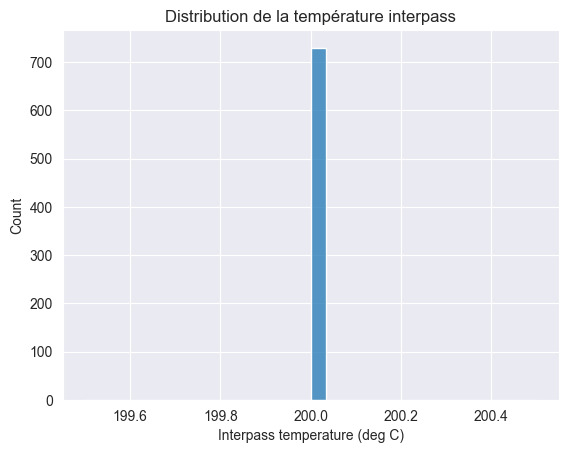

In [83]:
# Afficher les valeurs uniques et leur distribution
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
dataset_dir = Path('../4 - Dataset')

print(df_removed_outliers['Type of weld'].unique())
print(df_removed_outliers['Interpass temperature (deg C)'].unique())
sns.histplot(df_removed_outliers['Interpass temperature (deg C)'], bins=30)
plt.title('Distribution de la température interpass')
plt.show()

Ensuite le capping

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Charger les données
dataset_dir = Path('../4 - Dataset')
df = pd.read_csv(dataset_dir / 'clustering_weld_data.csv')

columns_to_analyze = [
    "Interpass temperature (deg C)",
    "Carbon concentration (ppm)",
    "Silicon concentration (ppm)",
    "Manganese concentration (ppm)",
    "Heat input (kJ/mm)",
    "Sulphur concentration (ppm)",
    "Phosphorus concentration (ppm)",
    "Oxygen concentration (ppm)",
    "Nitrogen concentration (ppm)",
    "Current (A)",
    "Voltage (V)",
    "Post weld heat treatment temperature (deg C)",
    "Post weld heat treatment time (hours)",
    "Nickel concentration (ppm)",
    "Chromium concentration (ppm)",
    "Molybdenum concentration (ppm)",
    "Vanadium concentration (ppm)",
    "Copper concentration (ppm)",
    "Titanium concentration (ppm)",
    "Aluminium concentration (ppm)",
    "Boron concentration (ppm)",
    "Niobium concentration (ppm)",
    "Yield strength (MPa)",
    "Ultimate tensile strength (MPa)",
    "Elongation (%)",
    "Reduction of Area (%)",
    "Charpy temperature (deg C)",
    "Charpy impact toughness (J)"
]
# Coefficients correspondants pour chaque colonne
coefficients = [3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

# 3. Capping des Outliers selon les coefficients
def cap_outliers_iqr(df, columns, coeffs, lower_quantile=0.25, upper_quantile=0.75):
    df_capped = df.copy()
    
    for col, coeff in zip(columns, coeffs):
        if col in df_capped.columns:  # Vérifier si la colonne existe
            Q1 = df_capped[col].quantile(lower_quantile)
            Q3 = df_capped[col].quantile(upper_quantile)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - coeff * IQR
            upper_bound = Q3 + coeff * IQR
            
            # Appliquer le capping
            df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
            df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])

    return df_capped

# Appliquer le capping sur les colonnes spécifiées avec les coefficients correspondants
df_with_capped_outliers = cap_outliers_iqr(df, columns_to_analyze, coefficients)

# 4. Sauvegarder le DataFrame avec capping
df_with_capped_outliers.to_csv(dataset_dir / 'clustering_weld_data_with_capped_outliers.csv', index=False)


# Vérification des quartiles et de l'IQR
Q1 = df['Interpass temperature (deg C)'].quantile(0.25)
Q3 = df['Interpass temperature (deg C)'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

# Vérifier les valeurs originales
print("Valeurs uniques de la température interpass avant capping:")
print(df['Interpass temperature (deg C)'].unique())

print("Les données ont été traitées et sauvegardées.")


Q1: 200.0, Q3: 200.0, IQR: 0.0
Valeurs uniques de la température interpass avant capping:
[200. 150. 175. 107. 100. 250. 140. 300.  20. 240. 177. 125. 225. 210.]
Les données ont été traitées et sauvegardées.


[0 4 2 1 3 9 8 7 5 6]
[200. 150. 175. 107. 100. 250. 140. 300.  20. 240. 177. 125. 225. 210.]
[200.]


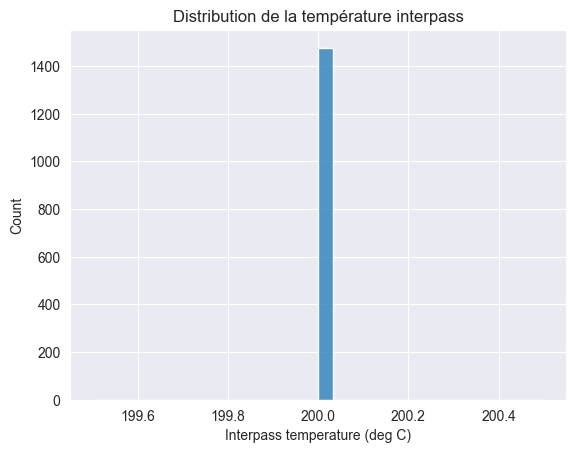

In [85]:
# Afficher les valeurs uniques et leur distribution
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
dataset_dir = Path('../4 - Dataset')


print(df_with_capped_outliers['Type of weld'].unique())
print(df['Interpass temperature (deg C)'].unique())
print(df_with_capped_outliers['Interpass temperature (deg C)'].unique())
sns.histplot(df_with_capped_outliers['Interpass temperature (deg C)'], bins=30)
plt.title('Distribution de la température interpass')
plt.show()

# Imputation univariate

Nous avons décidé d'utiliser l'imputation univarié pour les données manquantes entre 0% et 40%. Le choix de quelle imputation univarié est justifié par ceci:                                   Pour les données métriques ,si la colonne est symétrique, on utilise la moyenne.              si la colonne est asymétrique(avec des outliers), on utilise la médiane. Dans notre cas on utilise la médiane car toutes nos colonnes ont des outliers.

Pour les données catégorielles on utilise le mode (most frequent value)

In [88]:
import pandas as pd
from sklearn.impute import SimpleImputer
from pathlib import Path

# Définir le chemin du dossier de données
dataset_dir = Path('../4 - Dataset')

# Liste des fichiers à traiter
file_names = [
    'clustering_weld_data_removed_outliers.csv',
    'clustering_weld_data_with_capped_outliers.csv'
]

# Sélection des colonnes pour l'imputation
columns_to_impute = [
    "Sulphur concentration (ppm)",
    "Phosphorus concentration (ppm)",
    "Oxygen concentration (ppm)",
    "Nitrogen concentration (ppm)",
    "Current (A)",
    "Voltage (V)",
    "Post weld heat treatment temperature (deg C)",
    "Post weld heat treatment time (hours)"
]

# Création d'un imputeur univarié utilisant la médiane
imputer = SimpleImputer(strategy='median')

# Traiter chaque fichier
for file_name in file_names:
    # Charger les données
    df = pd.read_csv(dataset_dir / file_name)

    # Vérifier si toutes les colonnes à imputer existent
    missing_columns = [col for col in columns_to_impute if col not in df.columns]
    if missing_columns:
        print(f"Attention : Les colonnes suivantes sont manquantes dans le DataFrame {file_name} : {missing_columns}")
        continue  # Passer à l'itération suivante si des colonnes manquent

    # Application de l'imputation univariée sur les colonnes sélectionnées
    imputed_data = imputer.fit_transform(df[columns_to_impute])

    # Création d'une nouvelle DataFrame avec les données imputées
    df_imputed = pd.DataFrame(imputed_data, columns=columns_to_impute)

    # Ajouter les colonnes non imputées à la nouvelle DataFrame
    df_imputed = pd.concat([df.drop(columns=columns_to_impute).reset_index(drop=True), df_imputed], axis=1)

    # Afficher un aperçu de la DataFrame imputée
    print(f"DataFrame après imputation univariée par la médiane pour {file_name} :")
    print(df_imputed.head())

    # Vérifier les colonnes de la DataFrame imputée
    print(f"Colonnes dans la DataFrame imputée pour {file_name} :")
    print(df_imputed.columns)

    # Écrire la DataFrame imputée dans le même fichier CSV
    df_imputed.to_csv(dataset_dir / file_name, index=False)
    print(f"Les données imputées par la médiane ont été écrites dans '{file_name}' avec succès.")


DataFrame après imputation univariée par la médiane pour clustering_weld_data_removed_outliers.csv :
   Carbon concentration (ppm)  Silicon concentration (ppm)  \
0                       370.0                       3000.0   
1                       370.0                       3000.0   
2                       370.0                       3000.0   
3                       370.0                       3100.0   
4                       370.0                       3100.0   

   Manganese concentration (ppm)  Nickel concentration (ppm)  \
0                         6500.0                         0.0   
1                         6500.0                         0.0   
2                         6500.0                         0.0   
3                        10300.0                         0.0   
4                        10300.0                         0.0   

   Chromium concentration (ppm)  Molybdenum concentration (ppm)  \
0                           NaN                             NaN   
1      

In [89]:
import pandas as pd
from sklearn.impute import SimpleImputer
from pathlib import Path

# Définir le chemin du dossier de données
dataset_dir = Path('../4 - Dataset')

# Liste des fichiers à traiter
file_names = [
    'clustering_weld_data_removed_outliers.csv',
    'clustering_weld_data_with_capped_outliers.csv'
]

# Sélection des colonnes pour l'imputation
columns_to_impute = [
    "AC or DC",
    "Electrode positive or negative"
]

# Traiter chaque fichier
for file_name in file_names:
    # Charger les données
    df = pd.read_csv(dataset_dir / file_name)

    # Vérifier si toutes les colonnes à imputer existent
    missing_columns = [col for col in columns_to_impute if col not in df.columns]
    if missing_columns:
        print(f"Attention : Les colonnes suivantes sont manquantes dans le DataFrame {file_name} : {missing_columns}")
        continue  # Passer à l'itération suivante si des colonnes manquent

    # Création d'un imputeur univarié utilisant le mode
    imputer = SimpleImputer(strategy='most_frequent')

    # Application de l'imputation univariée sur les colonnes sélectionnées
    imputed_data = imputer.fit_transform(df[columns_to_impute])

    # Création d'une nouvelle DataFrame avec les données imputées
    df_imputed = pd.DataFrame(imputed_data, columns=columns_to_impute)

    # Ajouter les colonnes non imputées à la nouvelle DataFrame
    df_imputed = pd.concat([df.drop(columns=columns_to_impute).reset_index(drop=True), df_imputed], axis=1)

    # Afficher un aperçu de la DataFrame imputée
    print(f"DataFrame après imputation univariée par le mode pour {file_name} :")
    print(df_imputed.head())

    # Vérifier les colonnes de la DataFrame imputée
    print(f"Colonnes dans la DataFrame imputée pour {file_name} :")
    print(df_imputed.columns)

    # Écrire la DataFrame imputée dans le même fichier CSV
    df_imputed.to_csv(dataset_dir / file_name, index=False)
    print(f"Les données imputées par le mode ont été écrites dans '{file_name}' avec succès.")


DataFrame après imputation univariée par le mode pour clustering_weld_data_removed_outliers.csv :
   Carbon concentration (ppm)  Silicon concentration (ppm)  \
0                       370.0                       3000.0   
1                       370.0                       3000.0   
2                       370.0                       3000.0   
3                       370.0                       3100.0   
4                       370.0                       3100.0   

   Manganese concentration (ppm)  Nickel concentration (ppm)  \
0                         6500.0                         0.0   
1                         6500.0                         0.0   
2                         6500.0                         0.0   
3                        10300.0                         0.0   
4                        10300.0                         0.0   

   Chromium concentration (ppm)  Molybdenum concentration (ppm)  \
0                           NaN                             NaN   
1         

<Figure size 1000x600 with 0 Axes>

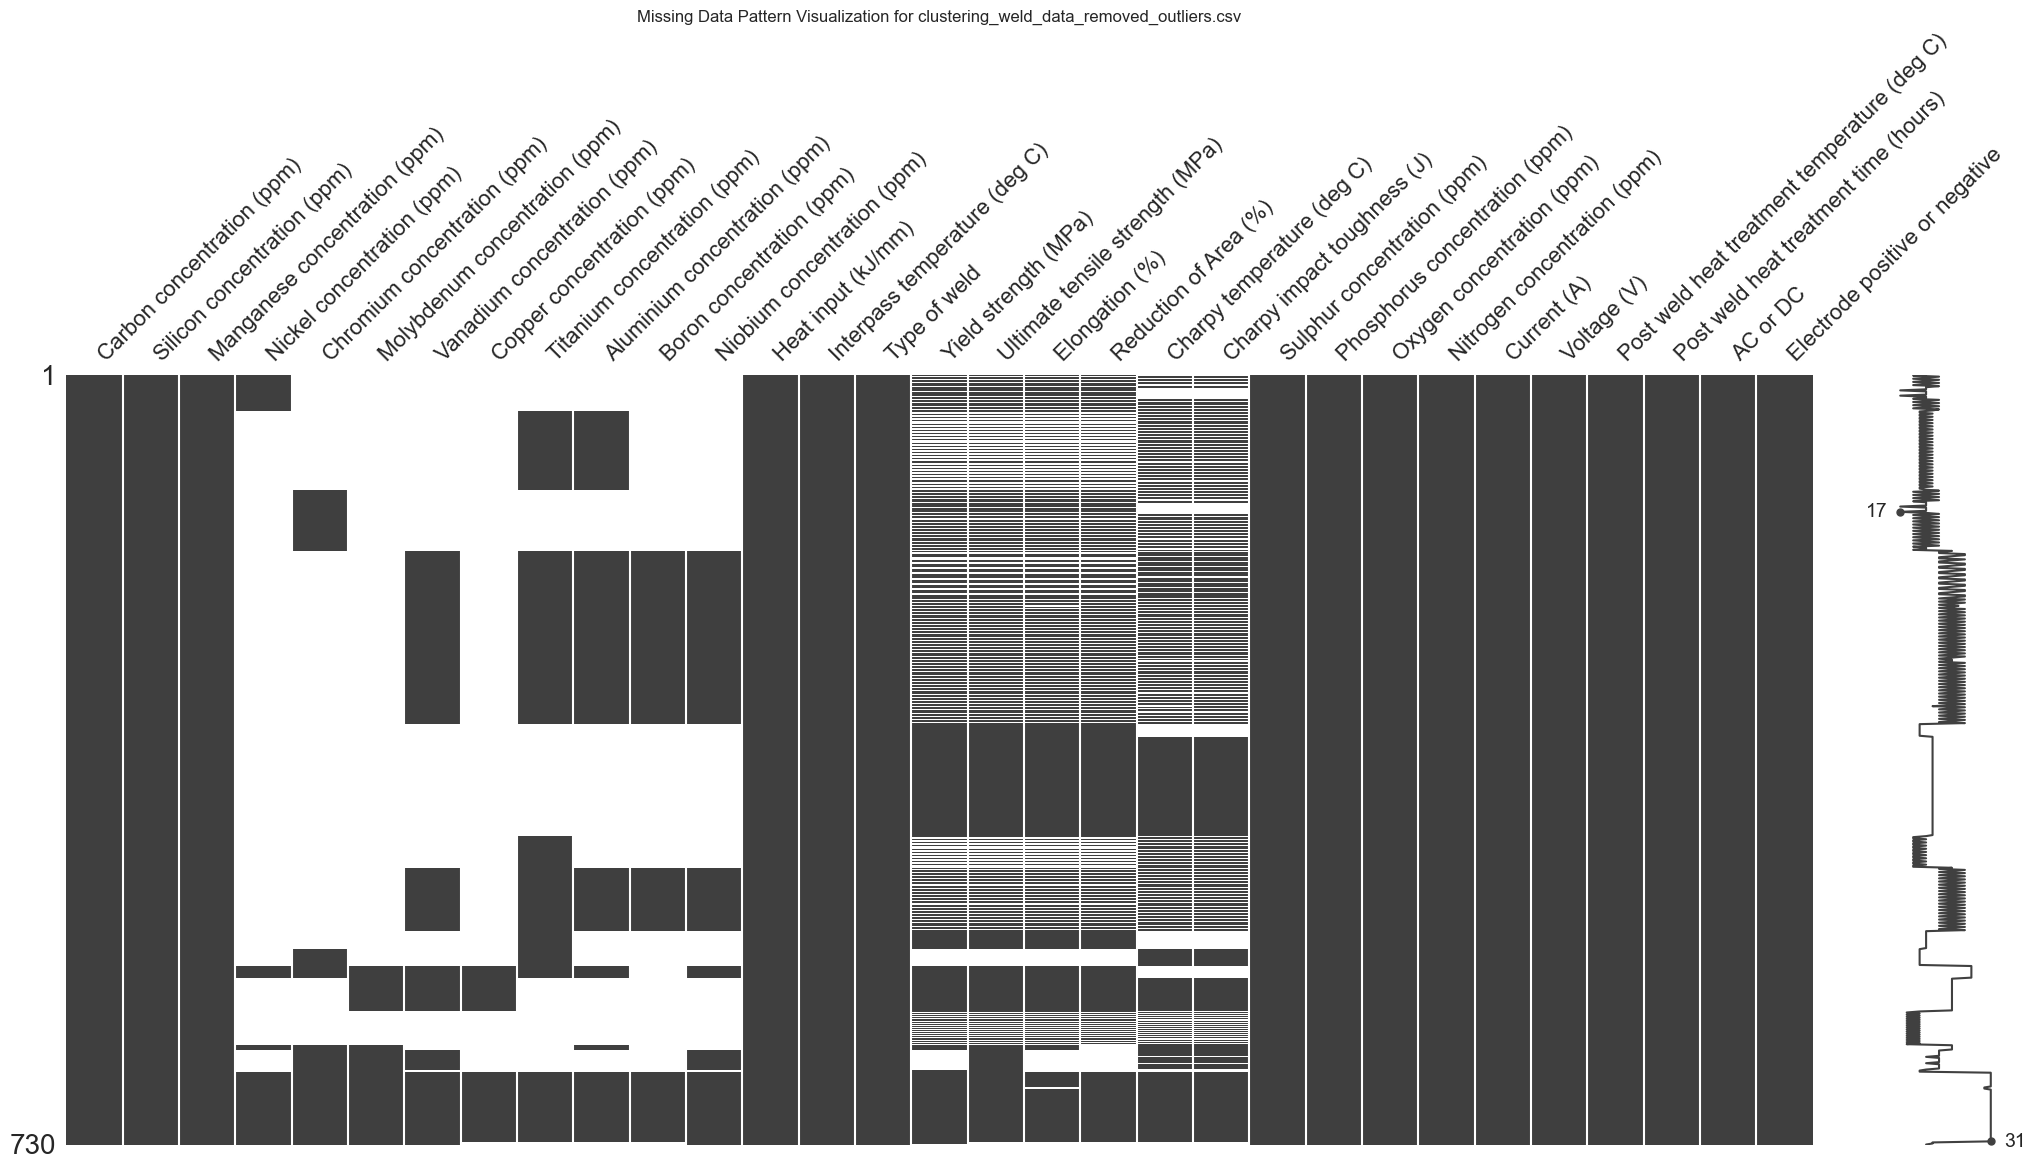

<Figure size 1000x600 with 0 Axes>

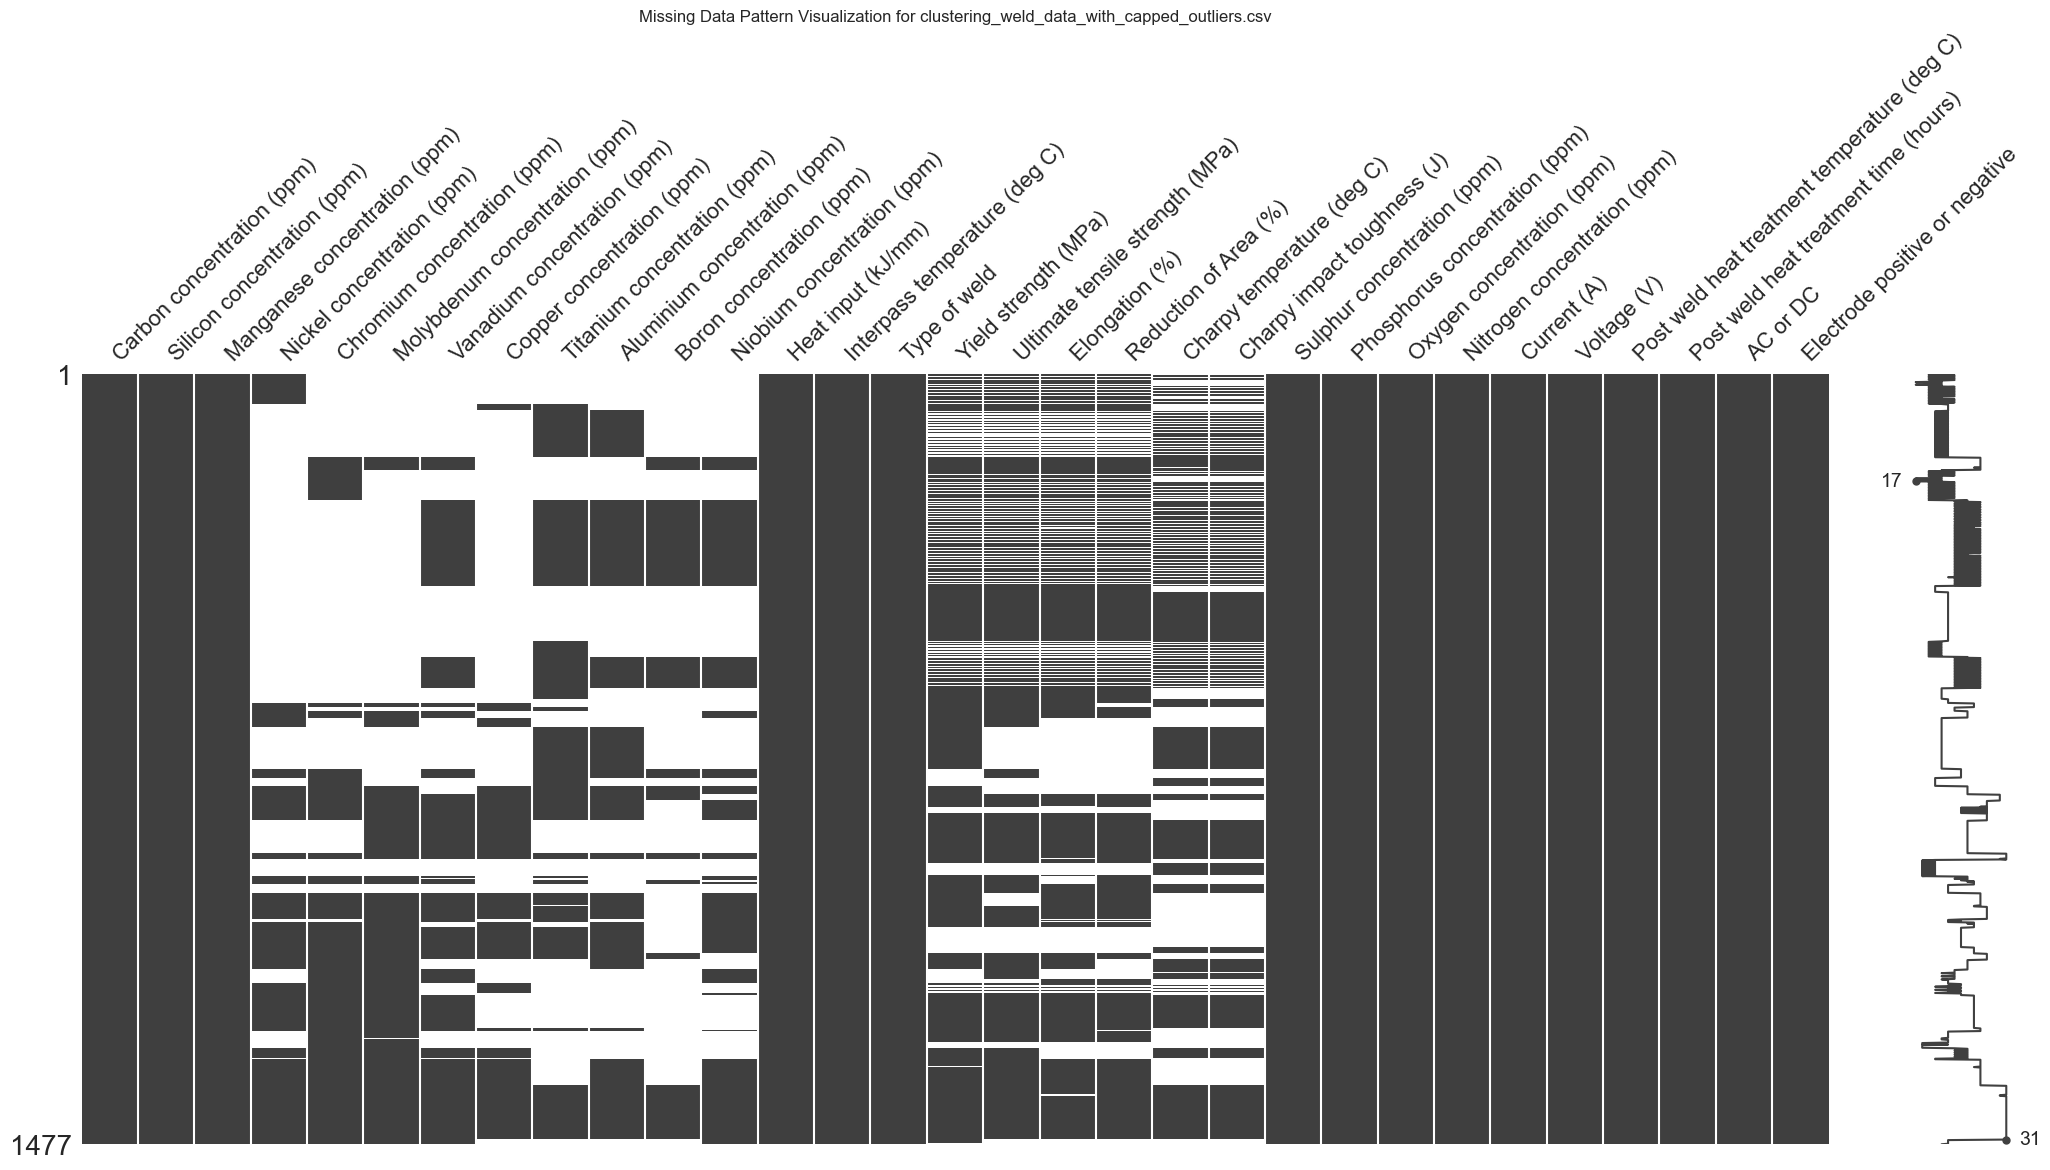

In [91]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from pathlib import Path

# Définir le chemin du dossier de données
dataset_dir = Path('../4 - Dataset')

# Liste des fichiers à traiter
file_names = [
    'clustering_weld_data_removed_outliers.csv',
    'clustering_weld_data_with_capped_outliers.csv'
]

# Traiter chaque fichier
for file_name in file_names:
    # Charger les données
    df = pd.read_csv(dataset_dir / file_name)

    # Visualiser le motif des données manquantes
    plt.figure(figsize=(10, 6))  # Définir la taille de la figure
    msno.matrix(df)
    plt.title(f"Missing Data Pattern Visualization for {file_name}")
    plt.show()


# Imputation Multivariate

Le reste des colonnes sont des colonnes dont 40% à 80% des valeurs sont manquantes . Pour ces valeurs nous avons décidé d'appliquer l'imputation mutlivariate. La Stochastic regression imputation semble être la plus adaptés dans notre cas vu qu'elle préserve les correlations entre les features sans renforcés les liens existants. Nous allons l'appliquer et voir le réultat sur nos deux datasets.

In [94]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # Nécessaire pour l'IterativeImputer
from sklearn.impute import IterativeImputer
from pathlib import Path

# Définir le chemin du dossier de données
dataset_dir = Path('../4 - Dataset')

# Liste des fichiers à traiter
file_names = [
    'clustering_weld_data_removed_outliers.csv',
    'clustering_weld_data_with_capped_outliers.csv'
]

# Sélection des colonnes pour l'imputation
columns_to_impute = [
    "Nickel concentration (ppm)",
    "Chromium concentration (ppm)",
    "Molybdenum concentration (ppm)",
    "Vanadium concentration (ppm)",
    "Copper concentration (ppm)",
    "Titanium concentration (ppm)",
    "Aluminium concentration (ppm)",
    "Boron concentration (ppm)",
    "Niobium concentration (ppm)",
    "Yield strength (MPa)",
    "Ultimate tensile strength (MPa)",
    "Elongation (%)",
    "Reduction of Area (%)",
    "Charpy temperature (deg C)",
    "Charpy impact toughness (J)"
]

# Exemple de stratégie, ajustable selon vos besoins
strategy = "stochastic"  # ou "regression"

# Traiter chaque fichier
for file_name in file_names:
    # Chargement des données
    df = pd.read_csv(dataset_dir / file_name)

    # Création d'une nouvelle DataFrame pour l'imputation
    df_to_impute = df[columns_to_impute]

    # Création d'un imputeur multivarié avec régression stochastique ou non
    it_imp = IterativeImputer(sample_posterior=(strategy == "stochastic"))

    # Application de l'imputation multivariée
    imputed_data = it_imp.fit_transform(df_to_impute)

    # Création d'une nouvelle DataFrame avec les données imputées
    df_imputed = pd.DataFrame(imputed_data, columns=columns_to_impute)

    # Ajouter les colonnes non imputées à la nouvelle DataFrame
    df_imputed = pd.concat([df.drop(columns=columns_to_impute).reset_index(drop=True), df_imputed], axis=1)

    # Afficher un aperçu de la DataFrame imputée
    print(f"DataFrame après imputation pour {file_name} :")
    print(df_imputed.head())

    # Enregistrer la DataFrame imputée dans le même fichier CSV
    df_imputed.to_csv(dataset_dir / file_name, index=False)
    print(f"Les données imputées ont été écrites dans '{file_name}' avec succès.")


DataFrame après imputation pour clustering_weld_data_removed_outliers.csv :
   Carbon concentration (ppm)  Silicon concentration (ppm)  \
0                       370.0                       3000.0   
1                       370.0                       3000.0   
2                       370.0                       3000.0   
3                       370.0                       3100.0   
4                       370.0                       3100.0   

   Manganese concentration (ppm)  Heat input (kJ/mm)  \
0                         6500.0                 1.0   
1                         6500.0                 1.0   
2                         6500.0                 1.0   
3                        10300.0                 1.0   
4                        10300.0                 1.0   

   Interpass temperature (deg C)  Type of weld  Sulphur concentration (ppm)  \
0                          200.0             0                         80.0   
1                          200.0             0          

<Figure size 1000x600 with 0 Axes>

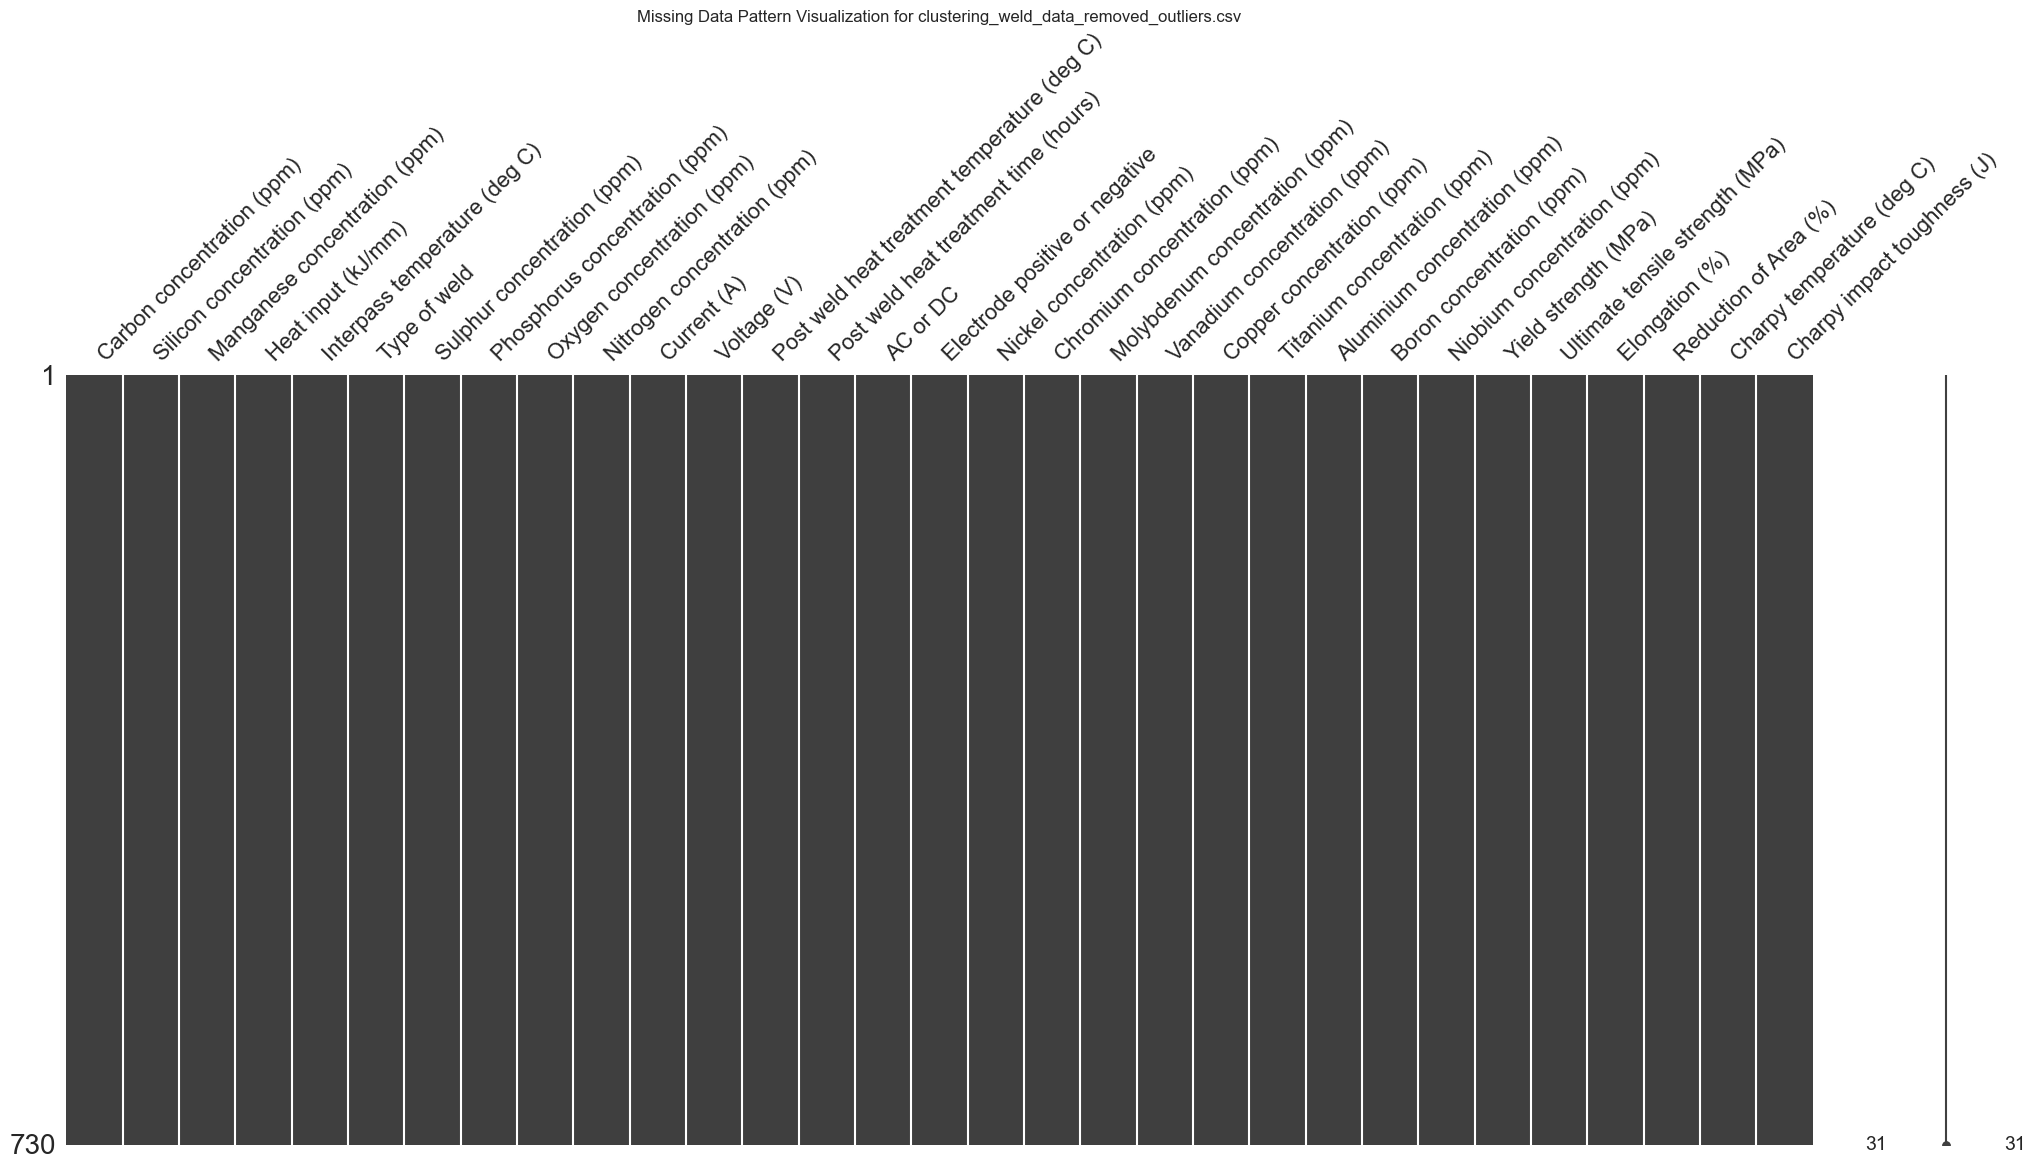

<Figure size 1000x600 with 0 Axes>

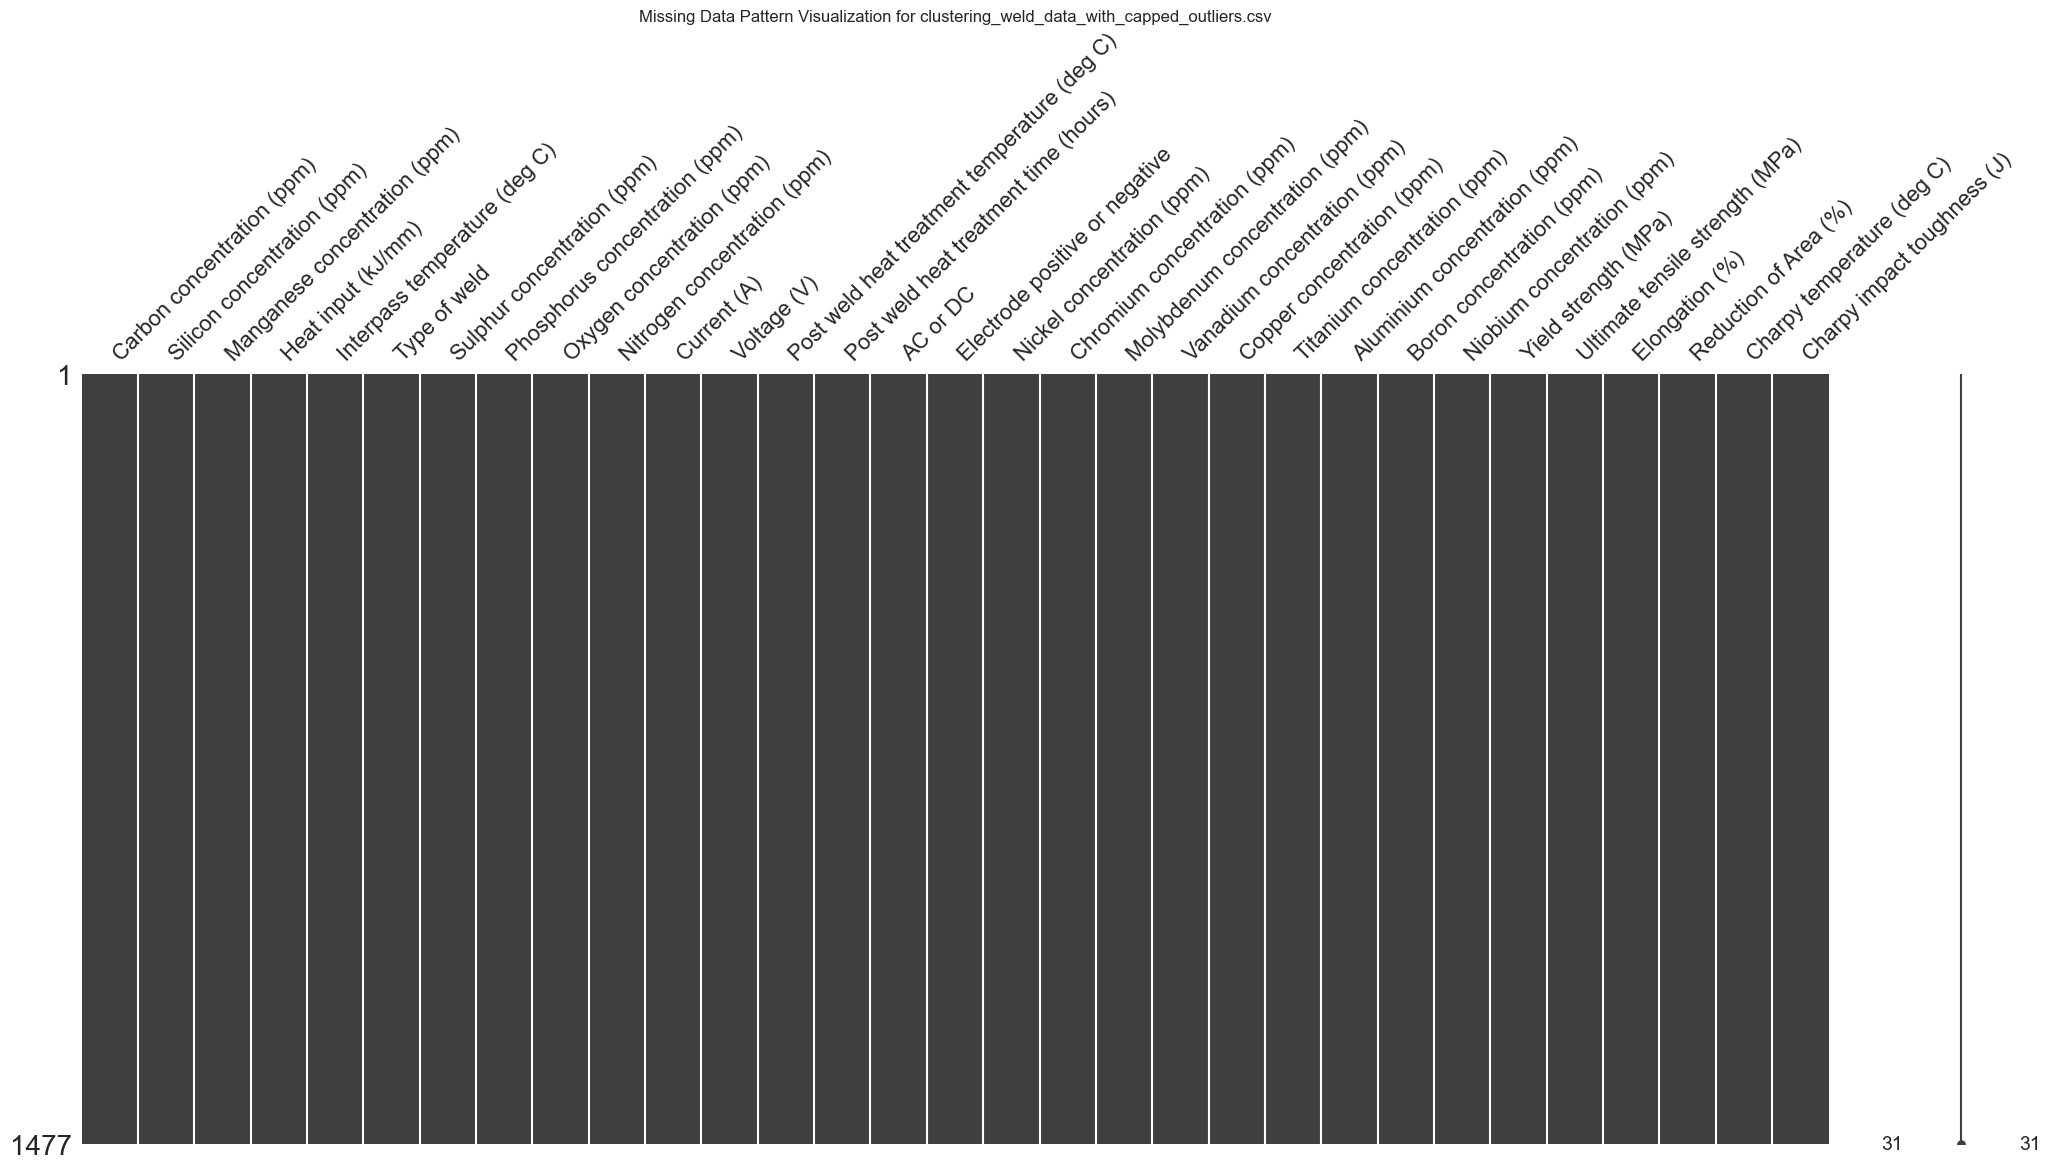

In [95]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from pathlib import Path

# Définir le chemin du dossier de données
dataset_dir = Path('../4 - Dataset')

# Liste des fichiers à traiter
file_names = [
    'clustering_weld_data_removed_outliers.csv',
    'clustering_weld_data_with_capped_outliers.csv'
]

# Traiter chaque fichier
for file_name in file_names:
    # Charger les données
    df = pd.read_csv(dataset_dir / file_name)

    # Visualiser le motif des données manquantes
    plt.figure(figsize=(10, 6))  # Définir la taille de la figure
    msno.matrix(df)
    plt.title(f"Missing Data Pattern Visualization for {file_name}")
    plt.show()


# Normalization (ou Standardization)

Maintenant on veut normaliser la donnée on utilise pour cela Min-Max Scaling.On applique ceci aux colonnes numériques bien évidemment.

In [96]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path

# Define your dataset directory
dataset_dir = Path('../4 - Dataset')

# Load the datasets
df_removed_outliers = pd.read_csv(dataset_dir / 'clustering_weld_data_removed_outliers.csv')
df_with_outliers = pd.read_csv(dataset_dir / 'clustering_weld_data_with_capped_outliers.csv')

# Specify the columns to normalize
columns_to_normalize = [
    "Carbon concentration (ppm)",
    "Silicon concentration (ppm)",
    "Manganese concentration (ppm)",
    "Heat input (kJ/mm)",
    "Interpass temperature (deg C)",
    "Sulphur concentration (ppm)",
    "Phosphorus concentration (ppm)",
    "Oxygen concentration (ppm)",
    "Nitrogen concentration (ppm)",
    "Current (A)",
    "Voltage (V)",
    "Post weld heat treatment temperature (deg C)",
    "Post weld heat treatment time (hours)",
    "Nickel concentration (ppm)",
    "Chromium concentration (ppm)",
    "Molybdenum concentration (ppm)",
    "Vanadium concentration (ppm)",
    "Copper concentration (ppm)",
    "Titanium concentration (ppm)",
    "Aluminium concentration (ppm)",
    "Boron concentration (ppm)",
    "Niobium concentration (ppm)",
    "Yield strength (MPa)",
    "Ultimate tensile strength (MPa)",
    "Elongation (%)",
    "Reduction of Area (%)",
    "Charpy temperature (deg C)",
    "Charpy impact toughness (J)"

]


# Créer le MinMaxScaler
scaler = MinMaxScaler()

# Normaliser les données pour les valeurs sans outliers
df_removed_outliers[columns_to_normalize] = scaler.fit_transform(df_removed_outliers[columns_to_normalize])

# Sauvegarder les données normalisées dans le même fichier
df_removed_outliers.to_csv(dataset_dir / 'clustering_weld_data_removed_outliers.csv', index=False)

# Normaliser les données pour les valeurs avec outliers
df_with_outliers[columns_to_normalize] = scaler.fit_transform(df_with_outliers[columns_to_normalize])

# Sauvegarder les données normalisées dans le même fichier
df_with_outliers.to_csv(dataset_dir / 'clustering_weld_data_with_capped_outliers.csv', index=False)

print("Les données ont été normalisées et sauvegardées avec succès.")

Les données ont été normalisées et sauvegardées avec succès.


# Shuffle

In [97]:
import pandas as pd
from pathlib import Path

# Définir le répertoire de votre dataset
dataset_dir = Path('../4 - Dataset')

# Charger les datasets
df_removed_outliers = pd.read_csv(dataset_dir / 'clustering_weld_data_removed_outliers.csv')
df_with_outliers = pd.read_csv(dataset_dir / 'clustering_weld_data_with_capped_outliers.csv')

# Mélanger les données de chaque dataset séparément
df_removed_outliers_shuffled = df_removed_outliers.sample(frac=1, random_state=42).reset_index(drop=True)
df_with_outliers_shuffled = df_with_outliers.sample(frac=1, random_state=42).reset_index(drop=True)

# Sauvegarder les données mélangées dans le même fichier
df_removed_outliers_shuffled.to_csv(dataset_dir / 'clustering_weld_data_removed_outliers.csv', index=False)
df_with_outliers_shuffled.to_csv(dataset_dir / 'clustering_weld_data_with_capped_outliers.csv', index=False)

print("Les données ont été mélangées et sauvegardées avec succès dans les fichiers d'origine.")


Les données ont été mélangées et sauvegardées avec succès dans les fichiers d'origine.


In [98]:
import pandas as pd
from pathlib import Path

# Définir le répertoire de votre dataset
dataset_dir = Path('../4 - Dataset')

# Charger les datasets
df_removed_outliers = pd.read_csv(dataset_dir / 'clustering_weld_data_removed_outliers.csv')
df_with_outliers = pd.read_csv(dataset_dir / 'clustering_weld_data_with_capped_outliers.csv')

# Afficher les valeurs uniques pour 'interpass temperature' et 'type of weld' pour le dataset sans outliers
print("Valeurs uniques pour 'interpass temperature' et 'type of weld' dans le dataset sans outliers :")
print(df_removed_outliers['Interpass temperature (deg C)'].unique())
print(df_removed_outliers['Type of weld'].unique())

# Afficher les valeurs uniques pour 'interpass temperature' et 'type of weld' pour le dataset avec outliers
print("\nValeurs uniques pour 'Interpass temperature(degC)' et 'Type of weld' dans le dataset avec outliers :")
print(df_with_outliers['Interpass temperature (deg C)'].unique())
print(df_with_outliers['Type of weld'].unique())

print(df_removed_outliers.dtypes)
print(df_with_outliers.dtypes)


Valeurs uniques pour 'interpass temperature' et 'type of weld' dans le dataset sans outliers :
[0.]
[0 4 3 6 1]

Valeurs uniques pour 'Interpass temperature(degC)' et 'Type of weld' dans le dataset avec outliers :
[0.]
[2 4 1 0 5 3 9 7 6 8]
Carbon concentration (ppm)                      float64
Silicon concentration (ppm)                     float64
Manganese concentration (ppm)                   float64
Heat input (kJ/mm)                              float64
Interpass temperature (deg C)                   float64
Type of weld                                      int64
Sulphur concentration (ppm)                     float64
Phosphorus concentration (ppm)                  float64
Oxygen concentration (ppm)                      float64
Nitrogen concentration (ppm)                    float64
Current (A)                                     float64
Voltage (V)                                     float64
Post weld heat treatment temperature (deg C)    float64
Post weld heat treatment time (